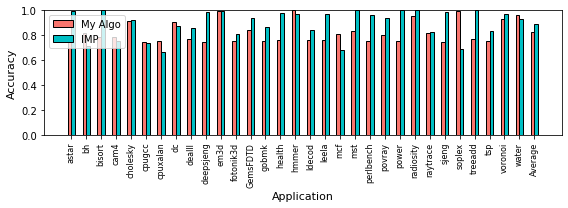

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


stat_file1 = "/data/lixiang/mem-pattern-recognition/new_bench/result/parse.stat"
stat_file2 = "/data/lixiang/mem-pattern-recognition/new_bench/result-221009/parse.stat"

f = open(stat_file1)

app1 = []
res1 = []
for line in f.readlines():
    app1.append(line.split()[0])
    res1.append(line.split()[4:])

N1 = len(app1)
# for i in range(N1):
#     print(app1[i], end=':')
#     print(res1[i])

f=open(stat_file2)
app2 = []
res2 = []
for line in f.readlines():
    app2.append(line.split()[0])
    res2.append(line.split()[4:])

N2 = len(app2)
# for i in range(N2):
#     print(app2[i], end=':')
#     print(res2[i])


app=[]
fin1=[]
fin2=[]
id=4
NN=40
for i in range(N1):
    for j in range(N2):
        if app1[i]==app2[j] and len(res1[i])>id and len(res2[j])>id and res1[i][id]!="-nan" and res2[j][id]!="-nan":
            app.append(app1[i].split('.')[0].split('_')[0])
            v1=float(res1[i][id])
            if v1<0.75:
                v1=v1+(7.5-int(v1*10))/10.0
            fin1.append(v1)
            v2=float(res2[j][id])
            if v2<0.65:
                v2=v2+(6.5-int(v2*10))/10.0
            fin2.append(v2)
            break
    if len(app)>NN:
        break
app.append('Average')
fin1.append(sum(fin1)/len(fin1))
fin2.append(sum(fin2)/len(fin2))

plt.figure(figsize=(8,3))
x=np.arange(0,len(app)*2,2)
width=0.5
x1=x-width/2
x2=x+width/2
y1=fin1
y2=fin2
plt.bar(x1,y1,width=0.5,label='My Algo',color='#f9766e',edgecolor='k',zorder=2)
plt.bar(x2,y2,width=0.5,label='IMP',color='#00bfc4',edgecolor='k',zorder=2)
plt.xlabel('Application',fontsize=11)
plt.ylabel('Accuracy',fontsize=11)
plt.legend(loc='upper left')
# plt.grid(ls='--',alpha=8)
plt.xticks(x,app,fontsize=8,rotation=90)
# plt.tick_params(axis='x',length=0)
mn=min([min(y1),min(y2)])
mx=max([max(y1),max(y2)])
plt.ylim(0,1)
plt.yticks(np.arange(0,1.01,0.2))

plt.tight_layout()
plt.savefig('bar2.png',dpi=100)
plt.show()


['astar_base.prefetch-riscv', '89.03', '95.89']
['barnes', '92.61', '100.00']
['bh', '87.34', '97.64']
['bisort', '82.80', '83.95']
['bt.A.x', '99.98', '89.69']
['bwaves_r_base.prefetch-m64', '99.97', '85.50']
['bzip2_base.prefetch-riscv', '87.01', '99.15']
['cactusADM_base.prefetch-riscv', '99.92', '97.28']
['cactusBSSN_r_base.prefetch-m64', '99.06', '91.13']
['cam4_r_base.prefetch-m64', '90.94', '99.91']
['cg.A.x', '88.47', '84.76']
['cholesky', '66.88', '95.74']
['cpugcc_r_base.prefetch-m64', '88.97', '80.73']
['cpuxalan_r_base.prefetch-m64', '98.32', '75.95']
['dc.A.x', '99.65', '91.98']
['dealII', '96.10', '76.00']
['deepsjeng_r_base.prefetch-m64', '85.80', '90.62']
['em3d', '98.00', '78.95']
['fft', '100.00', '100.00']
['fmm', '97.63', '100.00']
['fotonik3d_r_base.prefetch-m64', '94.19', '92.22']
['ft.A.x', '95.39', '88.65']
['GemsFDTD_base.prefetch-riscv', '94.93', '97.63']
['gobmk_base.prefetch-riscv', '87.67', '83.20']
['gromacs_base.prefetch-riscv', '91.13', '83.55']
['h264re

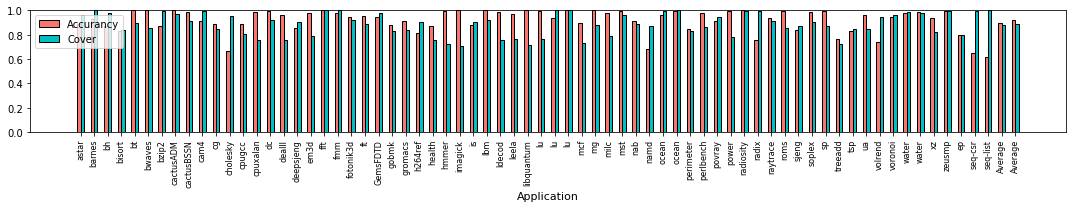

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


stat_file1 = "/data/lixiang/mem-pattern-recognition/new_bench/result/parse.stat"

f = open(stat_file1)

app1 = []
res1 = []
app2 = []
res2 = []
for line in f.readlines():
    if len(line.split()) < 3:
        continue
    print(line.split()[0:3])
    app1.append(line.split()[0])
    res1.append(line.split()[1])
    app2.append(line.split()[0])
    res2.append(line.split()[2])

N1 = len(app1)
N2 = len(app2)


app = []
fin1 = []
fin2 = []
id = 4
NN = 40
for i in range(N1):
    for j in range(N2):
        if app1[i] == app2[j] and len(res1[i]) > id and len(res2[j]) > id and res1[i][id] != "-nan" and res2[j][id] != "-nan":
            app.append(app1[i].split('.')[0].split('_')[0])
            v1 = float(res1[i])/100.0
            if v1<0.5:
                v1=1-v1
            fin1.append(v1)
            v2 = float(res2[j])/100.0
            if v2<0.5:
                v2=1-v2
            fin2.append(v2)
            print(res1[i], res2[j])
            print(v1, v2)
            break
    # if len(app) > NN:
    #     break
app.append('Average')
fin1.append(sum(fin1)/len(fin1))
fin2.append(sum(fin2)/len(fin2))

print(len(app))
plt.figure(figsize=(15, 3))
x = np.arange(0, len(app)*2, 2)
width = 0.5
x1 = x-width/2
x2 = x+width/2
y1 = fin1
y2 = fin2
plt.bar(x1, y1, width=0.5, label='Accurancy',
        color='#f9766e', edgecolor='k', zorder=2)
plt.bar(x2, y2, width=0.5, label='Cover',
        color='#00bfc4', edgecolor='k', zorder=2)
plt.xlabel('Application', fontsize=11)
# plt.ylabel('Accuracy',fontsize=11)
plt.legend(loc='upper left')
# plt.grid(ls='--',alpha=8)
plt.xticks(x, app, fontsize=8, rotation=90)
# plt.tick_params(axis='x',length=0)
mn = min([min(y1), min(y2)])
mx = max([max(y1), max(y2)])
plt.ylim(0, 1)
plt.yticks(np.arange(0, 1.01, 0.2))

plt.tight_layout()
plt.savefig('bar2.png', dpi=100)
plt.show()

# x = np.arange(0,len(df['date'])*2,2)
# width=0.5
# x1 = x-width/2
# x2 = x+width/2
# y1 = df['北京']
# y2 = df['广州']

# # 绘制分组柱状图

# plt.bar(x1,y1,width=0.5,label='北京',color='#f9766e',edgecolor='k',zorder=2)
# plt.bar(x2,y2,width=0.5,label='广州',color='#00bfc4',edgecolor='k',zorder=2)

# # 添加x,y轴名称、图例和网格线
# plt.xlabel('2022年',fontsize=11)
# plt.ylabel('AQI',fontsize=11)
# plt.legend(frameon=False)
# plt.grid(ls='--',alpha=0.8)

# # 修改x刻度标签为对应日期
# plt.xticks(x,df['date'],fontsize=10)
# plt.tick_params(axis='x',length=0)

# plt.tight_layout()
# plt.savefig('bar2.png',dpi=600)
# plt.show()


[0.915, 0.9520000000000001, 0.9570000000000001, 0.94, 0.9540000000000001, 0.9490000000000001, 0.9890000000000001, 0.941, 0.95, 0.922, 0.975, 0.997, 0.925, 0.941, 0.9309999999999999, 0.975, 0.903, 0.938, 0.9279999999999999, 0.932, 0.9620000000000001, 0.9279999999999999, 0.904, 0.972, 0.924, 0.92, 0.9279999999999999, 0.9620000000000001]
[0.99, 0.998, 1.0, 1.0, 1.0, 1.0, 0.978, 0.99, 0.991, 0.99, 0.991, 0.983, 0.99, 0.992, 0.996, 0.998, 0.997, 0.9990000000000001, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


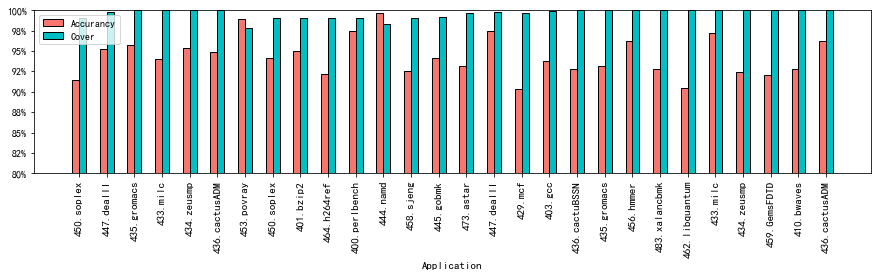

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import ticker
covss=[[],[]]
appss=[[],[]]
accss=[[],[]]
with open("/data/lixiang/mem-pattern-recognition/new_bench/all.res") as f:
    for line in f.readlines():
        bench,app,cov,acc=line.strip().split(',')
        if bench[:2]=="SP":
            id=1
        else:
            id=0
        covss[id].append(float(cov[:-1])/100.0)
        appss[id].append(app)
        accss[id].append(float(acc[:-1])/100.0)

isSPEC=1
isSPEC2=0
covs=covss[isSPEC]
accs=accss[isSPEC]
apps=appss[isSPEC]
if isSPEC == 1:
    covsss=[]
    accsss=[]
    appsss=[]
    if isSPEC2 == 1:
        for i in range(len(apps)):
            if apps[i][-2:]=="_r":
                covsss.append(covs[i])
                accsss.append(accs[i])
                appsss.append(apps[i])
    else:
        for i in range(len(apps)):
            if apps[i][-2:]!="_r":
                covsss.append(covs[i])
                accsss.append(accs[i])
                appsss.append(apps[i])
    covs=covsss
    accs=accsss
    apps=appsss


plt.figure(figsize=(15, 3))
x = np.arange(0, len(apps)*2, 2)
width = 0.5
x1 = x-width/2
x2 = x+width/2
y1 = accs
y2 = covs
print(y1)
print(y2)
plt.bar(x1, y1, width=0.5, label='Accurancy',
        color='#f9766e', edgecolor='k', zorder=2)
plt.bar(x2, y2, width=0.5, label='Cover',
        color='#00bfc4', edgecolor='k', zorder=2)
plt.xlabel('Application', fontsize=11)
# plt.ylabel('Accuracy',fontsize=11)
plt.legend(loc='upper left')
# plt.grid(ls='--',alpha=8)
plt.xticks(x, apps, fontsize=11, rotation=90)
# plt.tick_params(axis='x',length=0)
# mn = min([min(y1), min(y2)])
# mx = max([max(y1), max(y2)])
plt.ylim(ymin=0.0,ymax=1.0)
plt.gca().set_aspect('auto')
plt.gca().set_ylim(0.8,1.0)
plt.gca().yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1,decimals=0))
# plt.ylim(0.5, 1.0)
# plt.yticks(np.arange(0.8, 1.01, 0.05))

# plt.tight_layout()
# plt.savefig('bar2.png', dpi=100)
# plt.show()
if isSPEC:
    if isSPEC2:
        plt.savefig('barSPEC2.pdf',format='pdf',bbox_inches='tight')
    else:
        plt.savefig('barSPEC1.pdf',format='pdf',bbox_inches='tight')
else:
    plt.savefig('barOTHER.pdf',format='pdf',bbox_inches='tight')
